In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

import itertools, os, json, subprocess, subprocess, gzip, cv2
from tqdm import tqdm
from IPython.display import display

In [27]:
def shell(cmd, wait=True, ignore_error=False):
    if type(cmd) != str:
        cmd = ' '.join(cmd)
    process = subprocess.Popen(cmd, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    if not wait:
        return process
    out, err = process.communicate()
    if err and not ignore_error:
        print(err.decode('UTF-8'))
        if not ignore_error:
            raise RuntimeError('Error in command line call')
    return out.decode('UTF-8')

def list_dir(dir, ext, return_name=False):
    ext = '.' + ext.lower()
    if return_name:
        return [(file[:-len(ext)], dir + file) for file in os.listdir(dir) if file[-len(ext):].lower() == ext]
    else:
        return [dir + file for file in os.listdir(dir) if file[-len(ext):] == ext]

def make_dir(path):
    if not os.path.exists(path):
        os.makedirs(path)

root = '/home/ubuntu/SqueezeDet-Pruning/squeezeDet/'

data = root + 'data/'

def run(file):
    shell('python src/demo.py --input_path %s --demo_net=squeezeDet+ --out_dir=output/ --checkpoint logs/squeezedet_plus_ttq_two_layers/train/model.ckpt-8500' % file, ignore_error=True)
    return 'output/out_' + file.split('/')[-1]

def show(file):
    plt.figure(figsize=(15, 15))
    img = cv2.imread(file)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

In [31]:
images = list_dir(data + 'in/', 'png', return_name=True)
images

[('000009', '/home/ubuntu/SqueezeDet-Pruning/squeezeDet/data/in/000009.png'),
 ('000007', '/home/ubuntu/SqueezeDet-Pruning/squeezeDet/data/in/000007.png'),
 ('000006', '/home/ubuntu/SqueezeDet-Pruning/squeezeDet/data/in/000006.png'),
 ('000002', '/home/ubuntu/SqueezeDet-Pruning/squeezeDet/data/in/000002.png'),
 ('000003', '/home/ubuntu/SqueezeDet-Pruning/squeezeDet/data/in/000003.png'),
 ('sample', '/home/ubuntu/SqueezeDet-Pruning/squeezeDet/data/in/sample.png'),
 ('000001', '/home/ubuntu/SqueezeDet-Pruning/squeezeDet/data/in/000001.png'),
 ('000008', '/home/ubuntu/SqueezeDet-Pruning/squeezeDet/data/in/000008.png'),
 ('000004', '/home/ubuntu/SqueezeDet-Pruning/squeezeDet/data/in/000004.png'),
 ('000005', '/home/ubuntu/SqueezeDet-Pruning/squeezeDet/data/in/000005.png'),
 ('000000', '/home/ubuntu/SqueezeDet-Pruning/squeezeDet/data/in/000000.png')]

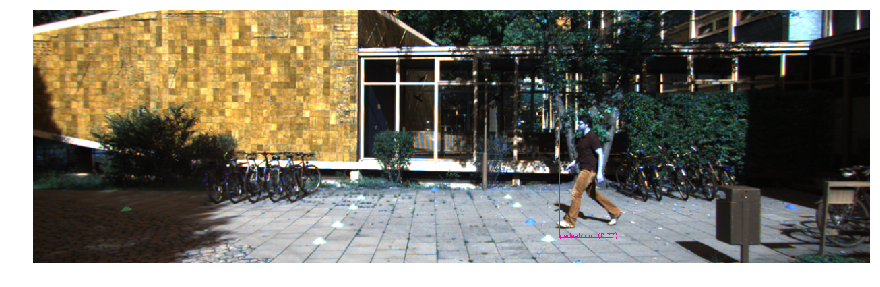

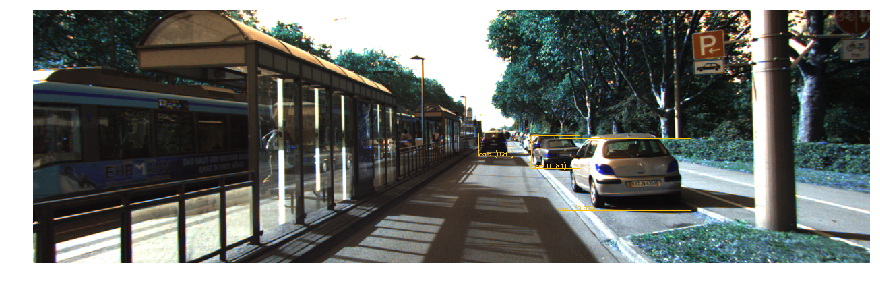

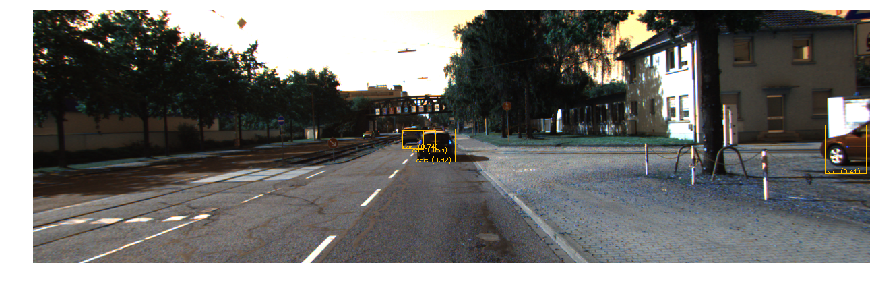

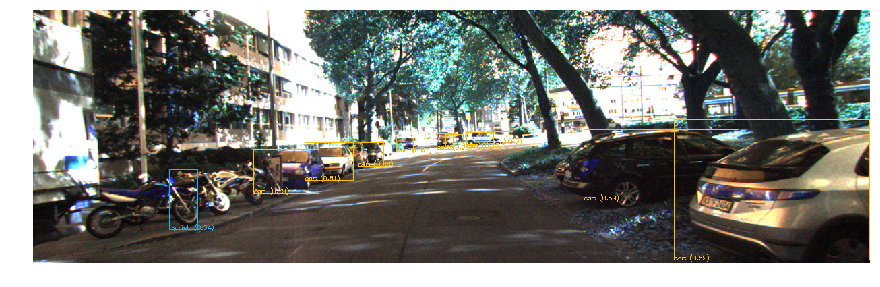

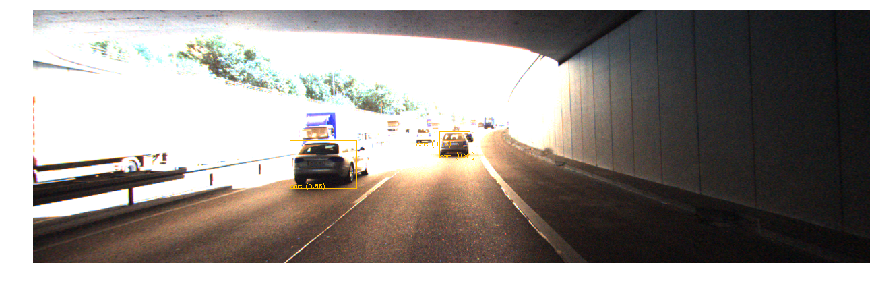

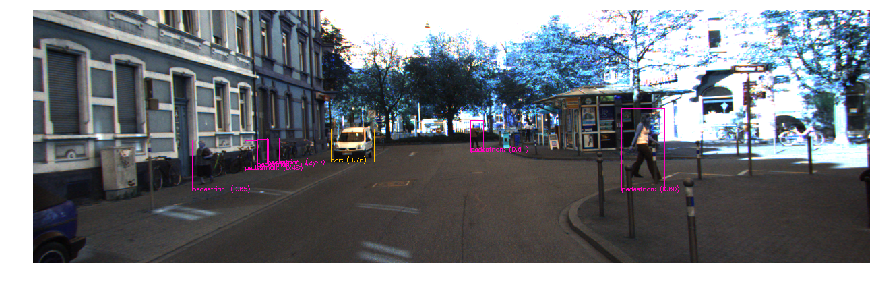

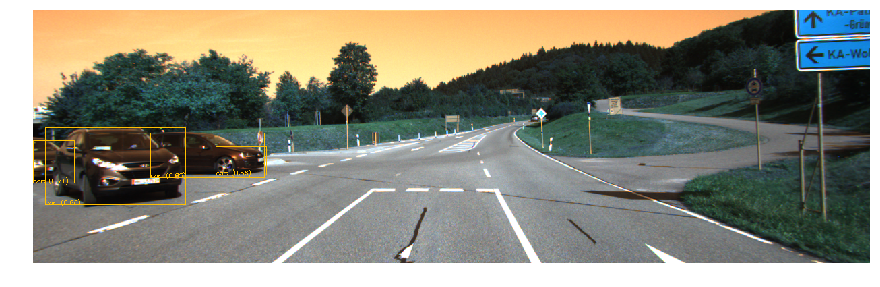

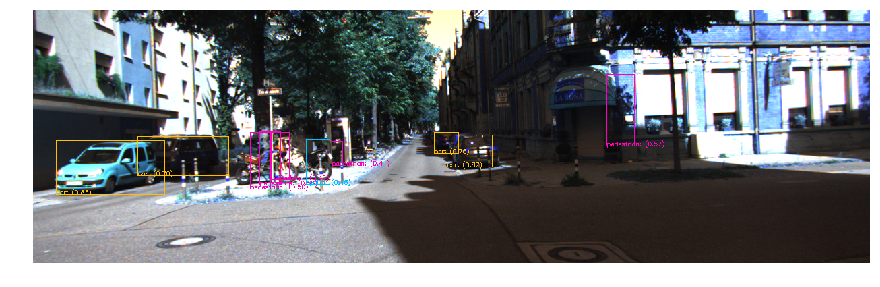

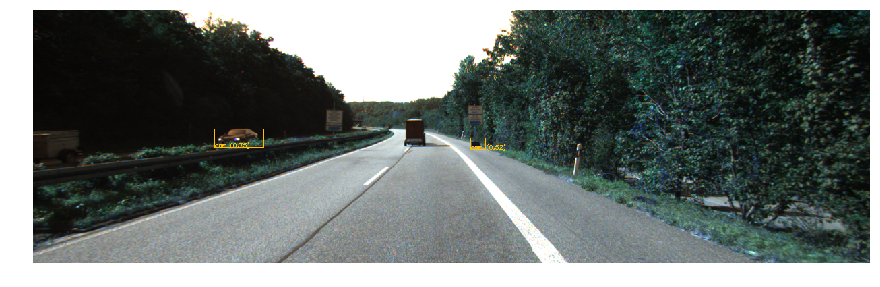

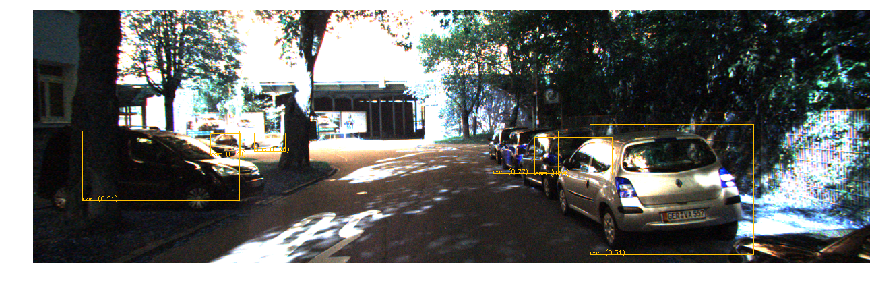

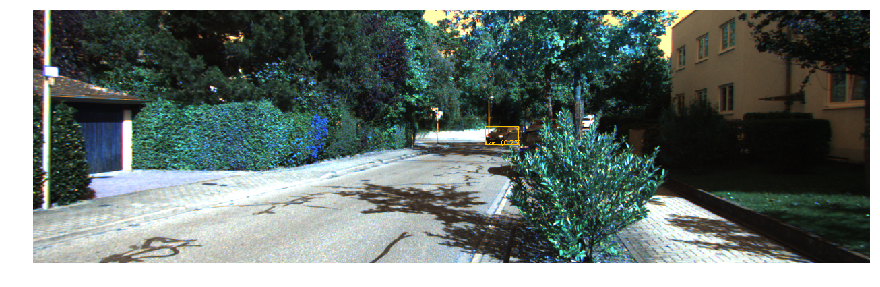

In [32]:
for name, path in images:
    output_path = run(path)
    show(output_path)
    